In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/My Drive/Placement_Dataset.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [6]:
df.shape

(215, 15)

In [7]:
df.isnull().sum()

,0
sl_no,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [9]:
df['salary'].fillna(df['salary'].median(),inplace=True)

<ipython-input-9-66dbdd0cf4a2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['salary'].fillna(df['salary'].median(),inplace=True)


In [10]:
df.isnull().sum()

,0
sl_no,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0


In [11]:
from sklearn.preprocessing import LabelEncoder
categorical_columns=['gender','hsc_b','ssc_b','hsc_s','degree_t','workex','specialisation','status']
LabelEncoder=LabelEncoder()
for column in categorical_columns:
    # Use df[column] instead of df[columns] to select the current column
    df[column]=LabelEncoder.fit_transform(df[column])
    print(df[column])

0      1
1      1
2      1
3      1
4      1
      ..
210    1
211    1
212    1
213    0
214    1
Name: gender, Length: 215, dtype: int64
0      1
1      1
2      0
3      0
4      0
      ..
210    1
211    1
212    1
213    1
214    1
Name: hsc_b, Length: 215, dtype: int64
0      1
1      0
2      0
3      0
4      0
      ..
210    1
211    1
212    1
213    1
214    0
Name: ssc_b, Length: 215, dtype: int64
0      1
1      2
2      0
3      2
4      1
      ..
210    1
211    2
212    1
213    1
214    2
Name: hsc_s, Length: 215, dtype: int64
0      2
1      2
2      0
3      2
4      0
      ..
210    0
211    2
212    0
213    0
214    0
Name: degree_t, Length: 215, dtype: int64
0      0
1      1
2      0
3      0
4      0
      ..
210    0
211    0
212    1
213    0
214    0
Name: workex, Length: 215, dtype: int64
0      1
1      0
2      0
3      1
4      0
      ..
210    0
211    0
212    0
213    1
214    1
Name: specialisation, Length: 215, dtype: int64
0      1
1      1
2 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    int64  
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    int64  
 6   hsc_s           215 non-null    int64  
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    int64  
 9   workex          215 non-null    int64  
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    int64  
 12  mba_p           215 non-null    float64
 13  status          215 non-null    int64  
 14  salary          215 non-null    float64
dtypes: float64(6), int64(9)
memory usage: 25.3 KB


<Axes: >

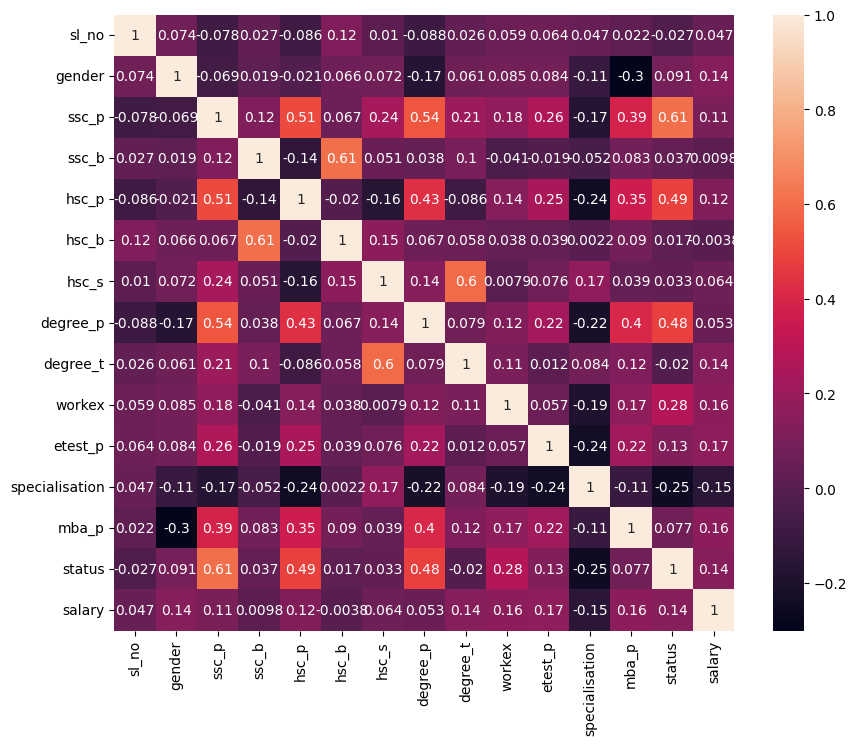

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [14]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,265000.0
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0


In [15]:
filtered_data = df[df['hsc_p'] > 65]

In [16]:
X = filtered_data.drop('status', axis=1)  # Drop the target column
Y= filtered_data['status']

In [17]:
X.shape

(104, 14)

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [19]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(83, 14)
(83,)
(21, 14)
(21,)


In [20]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
nb=GaussianNB()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
svm=SVC(kernel='linear')

In [30]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
knn=KNeighborsClassifier(n_neighbors=5)
nb=GaussianNB()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
svm=SVC(kernel='linear')
gb=GradientBoostingClassifier()

In [73]:
knn.fit(X_train,Y_train)
y_pred_knn=knn.predict(X_test)
accuracy_knn=accuracy_score(Y_test,y_pred_knn)

In [88]:
nb.fit(X_train,Y_train)
y_pred_nb=knn.predict(X_test)
accuracy_nb=accuracy_score(Y_test,y_pred_nb)

In [75]:
dt.fit(X_train,Y_train)
y_pred_dt=dt.predict(X_test)
accuracy_dt=accuracy_score(Y_test,y_pred_dt)

In [76]:
rf.fit(X_train,Y_train)
y_pred_rf=rf.predict(X_test)
accuracy_rf=accuracy_score(Y_test,y_pred_rf)

In [80]:
svm.fit(X_train,Y_train)
y_pred_svm=svm.predict(X_test)
accuracy_svm=accuracy_score(Y_test,y_pred_svm)

In [78]:
gb.fit(X_train,Y_train)
y_pred_gb=gb.predict(X_test)
accuracy_gb=accuracy_score(Y_test,y_pred_gb)

In [89]:
print('Accuracy of KNN:',accuracy_knn)
print('Accuracy of NB:',accuracy_nb)
print('Accuracy of DT:',accuracy_dt)
print('Accuracy of RF:',accuracy_rf)
print('Accuracy of SVM:',accuracy_svm)
print('Accuracy of GB:',accuracy_gb)

Accuracy of KNN: 0.9047619047619048
Accuracy of NB: 0.9047619047619048
Accuracy of DT: 0.8095238095238095
Accuracy of RF: 0.9047619047619048
Accuracy of SVM: 0.9047619047619048
Accuracy of GB: 0.8571428571428571


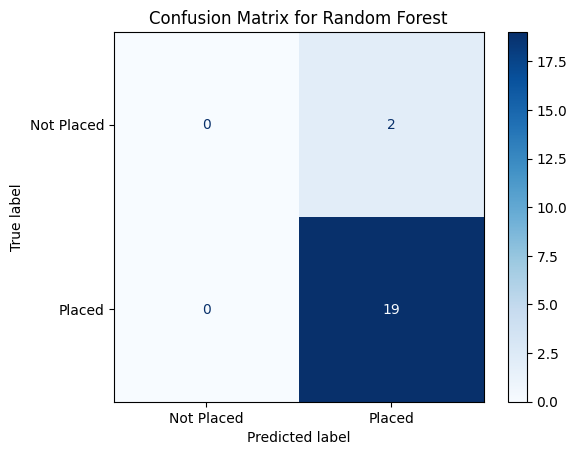

In [92]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
cm_rf = confusion_matrix(Y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Not Placed", "Placed"])
disp_rf.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Random Forest")
plt.show()

In [93]:
classification_report(Y_test,y_pred_rf)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00         2\n           1       0.90      1.00      0.95        19\n\n    accuracy                           0.90        21\n   macro avg       0.45      0.50      0.47        21\nweighted avg       0.82      0.90      0.86        21\n'